# **PyTorch Workflow**

**What we're going to cover:**
 - **Getting data ready**
    - **`torch.utils.data.Dataset`**
    - **`torch.utils.data.DataLoader`**
 - **Building a model**
    - **`torch.nn`**
    - **`torch.nn.Module`**
    - **`torch.nn.Parameter`**
    - **`torchvision.models`**
    - **`torch.optim`**
 - **Fitting the model to data (training)**
 - **Making predictions and evaluating a model (inference)**
    - **`torchmetrics`**
 - **Improving through experimentation**
    - **`torch.utils.tensorboard`**
 - **Saving and loading a model**

## **Imports**

In [1]:
# Imports
import torch
from torch import nn # Contaings building blocks for neural network

from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
# Check PyTorch version
torch.__version__

'2.0.1+cu118'

## **Device Agnostic Setting**

In [3]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


## **Data Preparation and Loading**

In [4]:
# Set random seed for reproducible code
torch.manual_seed(42)
np.random.seed(42)

In [5]:
# Import make_regression from sklearn
from sklearn.datasets import make_regression

# Number of samples to generate
num_samples = 20_000

# Generate data
X, y = make_regression(n_samples = num_samples, n_features = 2, noise = 0.5, random_state = 42)

In [6]:
# View sampels from X and y
print("Input Samples: \n", X[:5])
print("Output Samples: \n", y[:5])

Input Samples: 
 [[-1.47719621  0.61169205]
 [-0.15141607 -1.23725498]
 [ 0.80115196  0.90630674]
 [ 0.28121168 -0.18216058]
 [-0.5495544   1.20321278]]
Output Samples: 
 [  -1.00288422 -107.86284488  103.28091401   -5.47459593   81.4022419 ]


### **Split into Train and Test Set**

In [7]:
# Make training and testing data from the complete data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = 0.8, shuffle = True, random_state = 42
)

# Print the shape of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 2), (4000, 2), (16000,), (4000,))

## **Building Model**

In [8]:
# Create a multi layer regression model in PyTorch
class MultiLayerRegressionModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        # Use nn.Linear() for creating model parameters
        self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
        self.layer_2 = nn.Linear(in_features = 10, out_features = 5)
        self.layer_3 = nn.Linear(in_features = 5, out_features = 1)

    # Define forward() computation
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_3(self.layer_2(self.layer_1(x)))

### **Model Contents**

In [9]:
# Create a random seed
torch.manual_seed(42)

In [10]:
# Create instance of model
mlr_model = MultiLayerRegressionModel()
mlr_model

MultiLayerRegressionModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=5, bias=True)
  (layer_3): Linear(in_features=5, out_features=1, bias=True)
)

In [11]:
# View the model parameters
list(mlr_model.parameters())

[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188],
         [ 0.6146,  0.1323],
         [ 0.5224,  0.0958],
         [ 0.3410, -0.0998],
         [ 0.5451,  0.1045],
         [-0.3301,  0.1802]], requires_grad=True),
 Parameter containing:
 tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
          0.0667, -0.6984], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
           0.0346, -0.0997],
         [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
           0.1606, -0.1927],
         [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
           0.2475, -0.2247],
         [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
          -0.1886, -0.1886],
         [ 0.2844,  0.1054,  0.3043, -0.2610,

In [12]:
# List named parameters
mlr_model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

### **Move Model to GPU**

In [13]:
# Check model device
next(mlr_model.parameters()).device

device(type='cpu')

In [14]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
mlr_model.to(device)
next(mlr_model.parameters()).device

device(type='cuda', index=0)

## **Model Training**
**Things required for training:**
 - **Loss Function**
 - **Optimizer**

### **Loss Function and Optimizer**

In [15]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer to optimize the model parameters
optimizer = torch.optim.SGD(params = mlr_model.parameters(), lr = 1e-2)

### **Training and Testing Loop**

**Training Loop Requirements:**
 - **Set training mode**
 - **Forward pass**
 - **Calculate the loss**
 - **Optimizer zero grad**
 - **Loss backward `Backpropagation`**
 - **Optimizer step `Gradient Descent`**

In [16]:
# Move tensors to the device
X_train = torch.from_numpy(X_train).type(torch.float32).to(device)
y_train = torch.from_numpy(y_train).type(torch.float32).unsqueeze(1).to(device)

X_test = torch.from_numpy(X_test).type(torch.float32).to(device)
y_test = torch.from_numpy(y_test).type(torch.float32).unsqueeze(1).to(device)

In [17]:
# View shape of data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([16000, 2]),
 torch.Size([16000, 1]),
 torch.Size([4000, 2]),
 torch.Size([4000, 1]))

In [18]:
# Random seed for reproducible outputs
torch.manual_seed(42)

# Initialize epochs (training iterations)
epochs = 1_000

# Setup empty lists to track model progress
train_loss_values = []
test_loss_values = []
epoch_count = []

# Loop through the data
for epoch in range(epochs):
    # Training

    ## Set the model to training mode
    mlr_model.train()

    ## Forward pass
    train_pred = mlr_model(X_train)

    ## Calculate the loss
    train_loss = loss_fn(train_pred, y_train)

    ## Optimizer zero grad
    optimizer.zero_grad()

    ## Perform backpropagation
    train_loss.backward()

    ## Step the optimizer
    optimizer.step()

    # Testing

    ## Set the model to evaluation mode
    mlr_model.eval()

    ## Use inference mode for faster predictions
    with torch.inference_mode():
        ## Forward pass
        test_pred = mlr_model(X_test)

        ## Calculate the loss
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

    ## For every epochs track the progress
    if epoch % (epochs // 10) == 0:
        ## Update the lists
        epoch_count.append(epoch)
        train_loss_values.append(train_loss.cpu().detach().numpy())
        test_loss_values.append(test_loss.cpu().detach().numpy())

        ## Print the progress
        print(f"Epoch: {epoch}\t| MAE Train Loss: {train_loss:.4f} | MAE Test Loss: {test_loss:.4f}")

Epoch: 0	| MAE Train Loss: 72.0015 | MAE Test Loss: 73.4125
Epoch: 100	| MAE Train Loss: 70.4384 | MAE Test Loss: 71.7677
Epoch: 200	| MAE Train Loss: 6.1197 | MAE Test Loss: 1.1236
Epoch: 300	| MAE Train Loss: 6.1178 | MAE Test Loss: 1.1245
Epoch: 400	| MAE Train Loss: 6.1180 | MAE Test Loss: 1.1234
Epoch: 500	| MAE Train Loss: 6.1170 | MAE Test Loss: 1.1238
Epoch: 600	| MAE Train Loss: 6.1162 | MAE Test Loss: 1.1241
Epoch: 700	| MAE Train Loss: 6.1164 | MAE Test Loss: 1.1235
Epoch: 800	| MAE Train Loss: 6.1161 | MAE Test Loss: 1.1234
Epoch: 900	| MAE Train Loss: 6.1154 | MAE Test Loss: 1.1237


### **Plot Loss Curves**

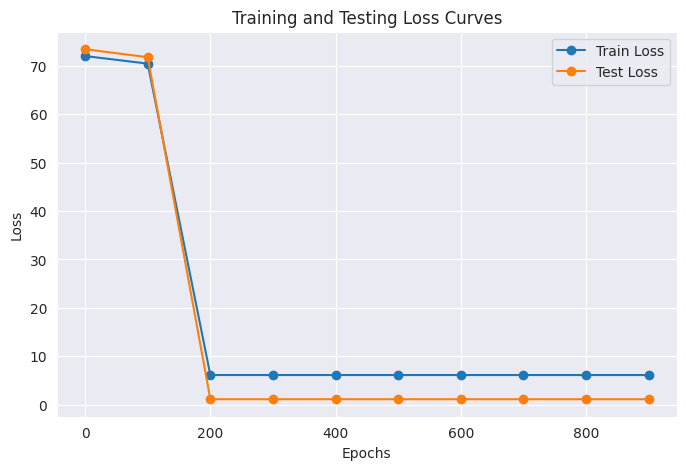

In [19]:
# Plot loss curves
plt.figure(figsize = (8, 5))
plt.plot(epoch_count, train_loss_values, label = "Train Loss", marker = "o")
plt.plot(epoch_count, test_loss_values, label = "Test Loss", marker = "o")
plt.title("Training and Testing Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

### **Learned Parameters**

In [20]:
# Print the models learned paraemters
print("\nLearned Parameter Values:")
print(mlr_model.state_dict())


Learned Parameter Values:
OrderedDict([('layer_1.weight', tensor([[ 1.5647,  2.7772],
        [ 0.4771,  2.0197],
        [ 0.2584,  1.0443],
        [-0.2596,  0.5816],
        [ 0.2284, -1.3649],
        [ 0.6517,  0.1859],
        [ 0.5215,  0.0720],
        [ 0.5736,  0.4082],
        [ 0.8452,  0.7401],
        [-0.0029,  0.8957]], device='cuda:0')), ('layer_1.bias', tensor([-0.0716,  0.0797, -0.1972,  0.5002, -0.6544, -0.2974, -0.1837, -0.3746,
         0.1457, -0.6280], device='cuda:0')), ('layer_2.weight', tensor([[ 0.4889, -0.1342,  0.3057,  0.0878, -0.1775,  0.2282,  0.0729,  0.2891,
          0.1027, -0.0544],
        [ 1.1925,  0.6633,  0.4287,  0.5075, -0.2140,  0.1033,  0.3658,  0.2159,
          0.5425,  0.0277],
        [-2.0709, -1.3091, -0.7155, -0.0947,  0.7221, -0.2459, -0.1853, -0.2607,
         -0.3579, -0.5763],
        [-1.2505, -1.0733, -0.2453, -0.3640,  0.5531, -0.3369,  0.0573, -0.3724,
         -0.6257, -0.4437],
        [ 1.5440,  0.9533,  0.6492, -0.0122

### **Making Predictions**

In [21]:
# Turn model into evaluation mode
mlr_model.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = mlr_model(X_test)

## **Saving a Model**

In [22]:
# Mount google drive
from google.colab import drive
drive.mount("./Drive", force_remount = True)

Mounted at ./Drive


In [23]:
# Create models directory
MODEL_PATH = Path("./Drive/MyDrive/PyTorch Course/models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# Create model save path
MODEL_NAME = "02_pytorch_multi_layer_regression.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving Model to: {MODEL_SAVE_PATH}")
torch.save(obj = mlr_model.state_dict(), f = MODEL_SAVE_PATH)

Saving Model to: Drive/MyDrive/PyTorch Course/models/02_pytorch_multi_layer_regression.pth


In [24]:
# Check the saved file path
!ls -l "./Drive/MyDrive/PyTorch Course/models/02_pytorch_multi_layer_regression.pth"

-rw------- 1 root root 2855 Jul 18 14:55 './Drive/MyDrive/PyTorch Course/models/02_pytorch_multi_layer_regression.pth'


## **Loading a Model**

In [25]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_mlr_model = MultiLayerRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_mlr_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

# Put the model on the device
loaded_mlr_model.to(device)

MultiLayerRegressionModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=5, bias=True)
  (layer_3): Linear(in_features=5, out_features=1, bias=True)
)

In [26]:
# Put the loaded model into evaluation mode
loaded_mlr_model.eval()

# Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_mlr_model(X_test.to(device))

In [27]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        ...,
        [True],
        [True],
        [True]], device='cuda:0')